## 00. Introduction

In this project we will use Logistic Regression from scratch to deal with a classification task. For this classification problem the heart failure prediction dataset is used, which contains 11 common features (e.g., age, sex, and several medical predictor variables) and 918 observations. We will build a Logistic regression model that can be used to predict whether the patient has heart disease (1) or not (0). 

## 01. Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 02. Load & Check Data

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
# we have 918 rows 
# 11 Attributes (6 Numeric and 5 Categorical), and target column (HeartDisease)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df["HeartDisease"].value_counts() # 508 has heart disease and 410 do not

1    508
0    410
Name: HeartDisease, dtype: int64

In [5]:
df.describe() # doesn't include the categorical values

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
#no null/empty or duplicated value

#df.isna().sum()
#df.duplicated().sum()
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## 03. Data Pre-processing & Feature Engineering 

The categorical features (i.e., Sex, ExerciseAngina, ChestPainType, RestingECG, STSlope) need to be converted into dummy/indicator or one-hot encoding variables.

### 03.a. One-hot encoding 

In [7]:
dummie_sex = pd.get_dummies(df.Sex)
dummie_EA = pd.get_dummies(df.ExerciseAngina)
dummie_CP = pd.get_dummies(df.ChestPainType)
dummie_RECG = pd.get_dummies(df.RestingECG)
dummie_STS = pd.get_dummies(df.ST_Slope)

In [8]:
#Merging dummy variables
merged_df = pd.concat([df,dummie_sex,dummie_EA,dummie_CP,dummie_RECG,dummie_STS],axis=1)
pd.set_option('display.max_columns', None)
merged_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


In [9]:
#dropping the categorical columns
final_df = merged_df.drop(['Sex','ExerciseAngina','ChestPainType','RestingECG','ST_Slope'], axis=1)
pd.set_option('display.max_columns', None)
final_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


In [10]:
final_df.shape

(918, 21)

In [11]:
Y = final_df.HeartDisease.values # Y is now a numpy array
X = final_df.drop(['HeartDisease'],axis=1)

In [12]:
print("Shape of X (features) : ", X.shape) # 918 rows and 20 columns(features)
print("Shape of Y (label) : ", Y.shape)    # 918 rows and 1 column for the label

Shape of X (features) :  (918, 20)
Shape of Y (label) :  (918,)


### 03.b. Train-Test Split (80%-20%) 

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.8, random_state = 42) 

### 03.c. Normalizing The Training & Testing Dataset 

In [14]:
X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train)).values
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
795,0.270833,0.60,0.398010,1.0,0.943662,0.386364,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
25,0.145833,0.65,0.346600,0.0,0.830986,0.295455,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
84,0.562500,0.75,0.353234,1.0,0.457746,0.409091,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10,0.166667,0.65,0.349917,0.0,0.577465,0.295455,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
344,0.458333,0.60,0.000000,1.0,0.309859,0.295455,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [15]:
X_test = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test)).values
X_test.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
668,0.729167,0.500000,0.345745,0.0,0.870968,0.215686,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30,0.520833,0.541667,0.918440,0.0,0.475806,0.215686,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
377,0.770833,0.666667,0.000000,1.0,0.411290,0.450980,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
535,0.583333,0.416667,0.000000,0.0,0.411290,0.411765,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
807,0.541667,0.233333,0.547872,0.0,0.685484,0.215686,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## 04. Logistic Regression by Applying the Library Functions  

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train,Y_train)
print("Test Accuracy without Cross Validation {0:.4g}%".format(lr.score(X_test,Y_test)*100))  #Test Accuracy 84.24%
print("--------------------------------------------------------------")

# 5 folds selected
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
results = cross_val_score(lr, X, Y, cv = kfold)
print("Test Accuracy with 5-fold cross validation: %.3f%% " % (results.mean()*100.0)) #Test Accuracy 86.714% 
print("--------------------------------------------------------------")

# Construct a confusion matrix
predicted = lr.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print("The Confusion Matrix is: ")
print(matrix) #[[67 10] [19 88]]
print("--------------------------------------------------------------")

#precision, recall, accuracy and f1 score by using classification_report
report = classification_report(Y_test, predicted)
print(report)

Test Accuracy without Cross Validation 84.24%
--------------------------------------------------------------
Test Accuracy with 5-fold cross validation: 86.714% 
--------------------------------------------------------------
The Confusion Matrix is: 
[[67 10]
 [19 88]]
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        77
           1       0.90      0.82      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



Using the SkLearn Library The Logistic Regression Model Has the Accuracy of 84.24%. 

If we Use the 5 fold Cross Validation the Accuracy jumps to 86.714%

The confusion Matrix shows the (tn, fp, fn, tp) = (67,10,19,88)

The F1 score is 0.84

In [17]:
#help(confusion_matrix)

## 05. Custom Logistic Regression Model 

The steps to build a custom Logistic Regression Algorithm:

1. Define the model structure (data shape).
2. Initialize model parameters (W, B).
3. Learn the parameters for the model by minimizing the cost:
   - Calculate current loss (forward propagation). Apply the linear and then nonlinear transformation (Sigmoid Function) on the input features 
   - Calculate current gradient (backward propagation). Deriving the first derivatives of the loss function with respect to the weights (W) and bias (B)
   - Update parameters (gradient descent).
4. Use the learned parameters to make predictions (on the test set).
5. Analyze the results and find the accuracy of the model.

We already have our training and testing datasets seperated and normalized from previous step. Here the raining dataset contains 734 rows(m) and 20 features(n). For easier mathematical computation the shape of the matrix is flipped to (n X m)    

In [18]:
print("Shape of X_train : ", X_train.shape)  # (734 X 20)
print("Shape of Y_train : ", Y_train.shape)  # (734 X 1)
print("Shape of X_test : ", X_test.shape)    # (184 X 20)
print("Shape of Y_test : ", Y_test.shape)    # (184 X 1)

Shape of X_train :  (734, 20)
Shape of Y_train :  (734,)
Shape of X_test :  (184, 20)
Shape of Y_test :  (184,)


In [19]:
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.reshape(1, X_train.shape[1])
Y_test = Y_test.reshape(1, X_test.shape[1])

In [20]:
print("Shape of X_train : ", X_train.shape)  # (20 X 734)
print("Shape of Y_train : ", Y_train.shape)  # (1 X 734)
print("Shape of X_test : ", X_test.shape)    # (20 X 184)
print("Shape of Y_test : ", Y_test.shape)    # (1 X 184)

Shape of X_train :  (20, 734)
Shape of Y_train :  (1, 734)
Shape of X_test :  (20, 184)
Shape of Y_test :  (1, 184)


## 05.a. Sigmoid Function

In a linear regression model, the hypothesis function is a linear combination of parameters given as y = ax+b for a simple single parameter data. This allows us to predict continuous values effectively, but in logistic regression, the response variables are binomial, either ‘yes’ or ‘no’. So, it makes less sense to use the linear function to predict anything except the values between 0 and 1. And the most effective function to limit the results of a linear equation to [0,1] is the sigmoid or logistic function.

In [21]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

## 05.b. Initializing Parameters

The data sets are always multidimensional. We will need to use matrices for any kind of calculation. So, for input, we have two matrices to deal with. The first one is for feature vectors, and the second is for parameters or weights. Our first matrix is of the m X n dimension, where m is the number of observations while n is the dimension of observations. And the second one is of nx1 dimension. Here, we will add a bias (0) initially to our feature vectors matrix and a corresponding parameter term to the weight vector. Bias is important to make the model more flexible.

In [22]:
def initialize_weight_bias(n):    # n is the number of features
    W = np.zeros((n,1))           # make a column vector of (nX1) with zeros
    B = 0                         # B is initialized to zero
    return W, B

## 05.c.
## Forward Propagation

Apply a linear transformation on the input feature(s) and
Apply a non linear transformation (sigmoid in our case) on top of the previous output to give the final output.

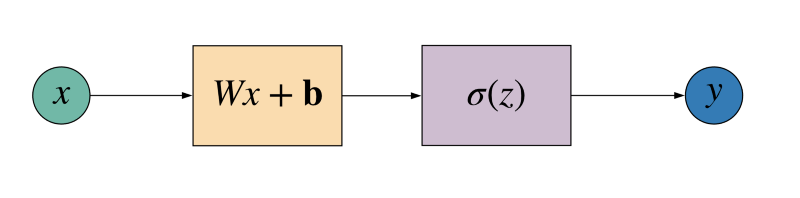


## Cost Function

Cost function or loss function is that function that describes how much the calculated value deviates from the actual value. Linear regression employs the least squared error as the cost function. But the least squared error function for logistic regression is non-convex. While performing gradient descent chances that we get stuck in a local minimum is more. So instead, we use log loss as the cost function.

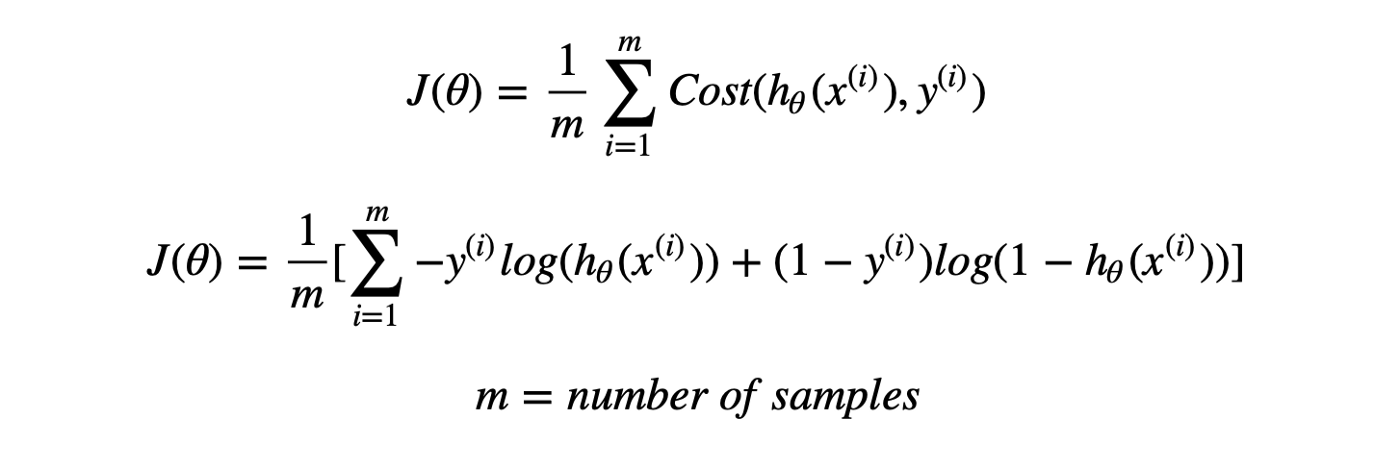


## Backward Propagation & Gradient Descent

The next step is gradient descent. The gradients are the vector of the 1st order derivative of the cost function w.r.t the Weights and Bias. These are the direction of the steepest ascent or maximum of a function. For gradient descent, we move in the opposite direction of the gradients. We will be updating the weights in every iteration until the convergence. The Learning rate is the step size responsible for how quick it converges to the global minimum. If the step size is too small, it will converge slowly, but if it is too large, it may overshoot the minimum while descending. (the proof is given in the report)
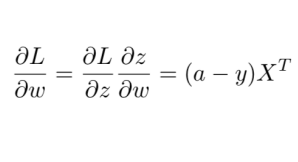 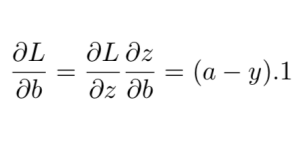 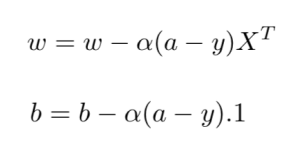 

In [23]:
def forward_backward_propagation(W, B, X, Y):           # X and Y are the training datasets
    
    m = X.shape[1]          # m is the number of training dataset (734)
    
    #forward propagation
    Z = np.dot(W.T, X) + B  #linear transformation
    A = sigmoid(Z)          #sigmoid activation function
    
    # cost function is to measure the error w.r.t the training label Y
    cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A)) 
    
    # Gradient Descent | Backward Propagation use the proof in the report
    # To minimize the cost function by finding the local minima
    dW = (1/m)*np.dot(A - Y, X.T)
    dB = (1/m)*np.sum(A - Y)
    
    gradients = {"Derivative_Weight": dW, "Derivative_Bias": dB}
    
    return cost, gradients

In [24]:
def update_learning_params(W, B, X, Y, learning_rate, number_of_iteration):
    
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iteration):
        
        #make forward and backward prop to find the cost and gradients
        cost, gradients = forward_backward_propagation (W, B, X, Y)   # X and Y are the training datasets
        cost_list.append(cost)
        
        #For gradient descent, we move in the opposite direction of the gradients. 
        #We will be updating the weights in every iteration until the convergence.
        W = W - learning_rate * gradients["Derivative_Weight"].T #keys
        B = B - learning_rate * gradients["Derivative_Bias"]
        
        if (i%(number_of_iteration/10) == 0):
            cost_list2.append(cost)
            index. append(i)
            print("cost after ", i, "iteration is : ", cost)
            
    
    parameters = {"Weight": W, "Bias": B}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [25]:
def predict (W, B, X): # the X here is the testing dataset
    
    #forward propagation on the testing dataset
    Z = sigmoid(np.dot(W.T, X) + B)          # sigmoid activation function, W and B are updated by gradient descent
    Y_predicted = np.zeros((1, X.shape[1]))  # y is an array of zero of shape of the testing dataset
    
    for i in range (Z.shape[1]):
        if Z[0,i] <= 0.5:
            Y_predicted[0,i] = 0
        else:
            Y_predicted[0,i] = 1
    return Y_predicted

In [26]:
def logistic_model(trainX, trainY, testX, testY, learning_rate, iterations):
    
    m = trainX.shape[1] # number of samples dataset
    n = trainX.shape[0] # number of features/attributes in one dataset
    W, B = initialize_weight_bias(n)
    
    parameters, gradients, cost_list = update_learning_params(W, B, trainX, trainY, learning_rate, iterations)
    
    y_prediction_test = predict(parameters["Weight"], parameters["Bias"], testX)
    
    accuracy = 100 - np.mean(np.abs(y_prediction_test - testY)) * 100
    
    print ("Test Accuracy: ", np.round(accuracy, 3), "%")
    return y_prediction_test, accuracy

cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.4371756085496092
cost after  20000 iteration is :  0.3838748671585977
cost after  30000 iteration is :  0.36428611253996535
cost after  40000 iteration is :  0.3547382006290552
cost after  50000 iteration is :  0.3492261187566167
cost after  60000 iteration is :  0.34566217655661857
cost after  70000 iteration is :  0.34316508363082815
cost after  80000 iteration is :  0.34130942316221363
cost after  90000 iteration is :  0.33986807956717957


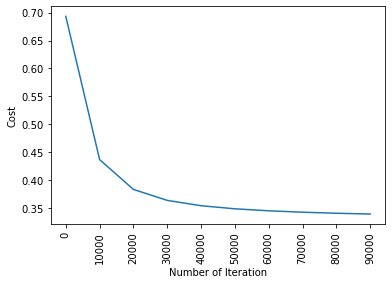

Test Accuracy:  85.326 %


In [27]:
Y_pred, accuracy = logistic_model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0005, iterations = 100000)
#Test Accuracy: 85.33 %

Our Logistic Regression model gave around 85.33% accuracy

## 05.d. Confusion Matrix For The Custom LR Model

In [28]:
Y_test = Y_test.T   # one column vector
Y_pred = Y_pred.T   # one column vector

In [29]:
def confusion_matrix(pred,original): #pass predicted and original labels to this function

    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    matrix=np.zeros((2,2))
    
    for i in range(len(pred)): #the confusion matrix is for 2 classes: 1,0
        
        
        if int(pred[i][0])== 1 and (original[i][0])==1: 
            TP += 1 #True Positives
        elif int(pred[i][0])== 1 and (original[i][0])== 0:
            FP += 1 #False Positives
        elif int(pred[i][0])== 0 and (original[i][0])==1:
            FN += 1 #False Negatives
        elif int(pred[i][0])==0 and (original[i][0])==0:
            TN += 1 #True Negatives
    
    precision = TP / (TP + FP)
    print("Precision:",np.round(precision*100, 2), "%")
    recall = TP / (TP + FN)
    print("Recall:",np.round(recall*100, 2), "%")
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    print("Accuracy:",np.round(accuracy*100, 2), "%")
    f1= 2*(precision*recall)/(precision+recall) 
    print("F1 score:",np.round (f1*100, 2), "%")

    matrix[0][0] = TP
    matrix[0][1] = FP
    matrix[1][0] = FN
    matrix[1][1] = TN
    
    return matrix

In [30]:
confusion_matrix(Y_pred,Y_test) 

Precision: 90.0 %
Recall: 84.11 %
Accuracy: 85.33 %
F1 score: 86.96 %


array([[90., 10.],
       [17., 67.]])

Precision: 90.0

Recall: 84.11

Accuracy: 85.33

F1 score: 86.96

array([[90., 10.],
       [17., 67.]])

## 05.e. Cross Validation

1. The dataset is split into training and test dataset.
2. The training dataset is then split into K-folds. (5 in this project)
3. Out of the K-folds, (K-1) fold is used for training
4. 1 fold is used for testing
5. The model with specific hyperparameters is trained with training data (K-1 folds) and validation data as 1 fold. The performance of the model is recorded.
6. The above steps (step 3, step 4, and step 5) is repeated until each of the k-fold got used for validation purpose. This is why it is called k-fold cross-validation.
7. Finally, the mean and standard deviation of the model performance is computed by taking all of the model scores calculated in step 5 for each of the K models.
8. Step 3 to Step 7 is repeated for different values of hyperparameters.
9. Finally, the hyperparameters which result in the most optimal mean and the standard value of model scores get selected.
10. The model is then trained using the training data set (step 2) and the model performance is computed on the test data set (step 1).

In [31]:
final_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


In [32]:
final_df = final_df.reindex(np.random.permutation(final_df.index))                                                          
print("Randomized data by randomizing the index : ")

final_df

Randomized data by randomizing the index : 


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
91,39,130,307,0,140,0.0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1
591,58,100,213,0,110,0.0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1
619,74,120,269,0,121,0.2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
842,43,132,341,1,136,3.0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0
664,65,150,225,0,114,1.0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,50,150,215,0,140,0.0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1
790,62,138,294,1,106,1.9,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0
863,60,140,185,0,155,3.0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0
550,55,172,260,0,73,2.0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0


In [33]:
final_df = final_df.reset_index(drop=True)                                                                                   
print("Randomized data with reseted index: ")

final_df

Randomized data with reseted index: 


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,39,130,307,0,140,0.0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1
1,58,100,213,0,110,0.0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1
2,74,120,269,0,121,0.2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
3,43,132,341,1,136,3.0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0
4,65,150,225,0,114,1.0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,50,150,215,0,140,0.0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1
914,62,138,294,1,106,1.9,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0
915,60,140,185,0,155,3.0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0
916,55,172,260,0,73,2.0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0


In [34]:
#five folds                                                              
fold1 = final_df.loc[0:183]                                            
fold2 = final_df.loc[184:367]
fold3 = final_df.loc[368:551]
fold4 = final_df.loc[552:734]
fold5 = final_df.loc[735:917]

In [35]:
#creating five different train-test split 

train_val1 = pd.concat([fold1, fold2, fold3, fold4])
test_val1 = fold5

train_val2 = pd.concat([fold1, fold2, fold3, fold5])
test_val2 = fold4

train_val3 = pd.concat([fold1, fold2, fold4, fold5])
test_val3 = fold3

train_val4 = pd.concat([fold1, fold3, fold4, fold5])
test_val4 = fold2

train_val5 = pd.concat([fold2, fold3, fold4, fold5])
test_val5 = fold1

In [36]:
# seperating the X and Y in each fold

train_val1_Y = train_val1.HeartDisease.values
train_val1_X = train_val1.drop(['HeartDisease'],axis=1)
test_val1_Y = test_val1.HeartDisease.values
test_val1_X = test_val1.drop(['HeartDisease'],axis=1)

train_val2_Y = train_val2.HeartDisease.values
train_val2_X = train_val2.drop(['HeartDisease'],axis=1)
test_val2_Y = test_val2.HeartDisease.values
test_val2_X = test_val2.drop(['HeartDisease'],axis=1)

train_val3_Y = train_val3.HeartDisease.values
train_val3_X = train_val3.drop(['HeartDisease'],axis=1)
test_val3_Y = test_val3.HeartDisease.values
test_val3_X = test_val3.drop(['HeartDisease'],axis=1)

train_val4_Y = train_val4.HeartDisease.values
train_val4_X = train_val4.drop(['HeartDisease'],axis=1)
test_val4_Y = test_val4.HeartDisease.values
test_val4_X = test_val4.drop(['HeartDisease'],axis=1)

train_val5_Y = train_val5.HeartDisease.values
train_val5_X = train_val5.drop(['HeartDisease'],axis=1)
test_val5_Y = test_val5.HeartDisease.values
test_val5_X = test_val5.drop(['HeartDisease'],axis=1)

In [37]:
#Normalizing the training datasets for each fold

train_val1_X = (train_val1_X - np.min(train_val1_X)) / (np.max(train_val1_X) - np.min(train_val1_X)).values
train_val2_X = (train_val2_X - np.min(train_val2_X)) / (np.max(train_val2_X) - np.min(train_val2_X)).values
train_val3_X = (train_val3_X - np.min(train_val3_X)) / (np.max(train_val3_X) - np.min(train_val3_X)).values
train_val4_X = (train_val4_X - np.min(train_val4_X)) / (np.max(train_val4_X) - np.min(train_val4_X)).values
train_val5_X = (train_val5_X - np.min(train_val5_X)) / (np.max(train_val5_X) - np.min(train_val5_X)).values

In [38]:
#Normalizing the testing datasets for each fold

test_val1_X = (test_val1_X - np.min(test_val1_X)) / (np.max(test_val1_X) - np.min(test_val1_X)).values
test_val2_X = (test_val2_X - np.min(test_val2_X)) / (np.max(test_val2_X) - np.min(test_val2_X)).values
test_val3_X = (test_val3_X - np.min(test_val3_X)) / (np.max(test_val3_X) - np.min(test_val3_X)).values
test_val4_X = (test_val4_X - np.min(test_val4_X)) / (np.max(test_val4_X) - np.min(test_val4_X)).values
test_val5_X = (test_val5_X - np.min(test_val5_X)) / (np.max(test_val5_X) - np.min(test_val5_X)).values

Reshaping the Matrices (in all 5 folds) for calculation purpose:

In [39]:
train_val1_X = train_val1_X.T
train_val1_Y = train_val1_Y.T
test_val1_X = test_val1_X.T
test_val1_Y = test_val1_Y.T

In [40]:
print("Shape of train_val1_X : ", train_val1_X.shape) #(20, 735)
print("Shape of train_val1_Y : ", train_val1_Y.shape) #(735,)
print("Shape of test_val1_X : ", test_val1_X.shape)   #(20, 735)
print("Shape of test_val1_Y : ", test_val1_Y.shape)   #(183,)

Shape of train_val1_X :  (20, 735)
Shape of train_val1_Y :  (735,)
Shape of test_val1_X :  (20, 183)
Shape of test_val1_Y :  (183,)


In [41]:
train_val2_X = train_val2_X.T
train_val2_Y = train_val2_Y.T
test_val2_X = test_val2_X.T
test_val2_Y = test_val2_Y.T

In [42]:
print("Shape of train_val2_X : ", train_val2_X.shape)
print("Shape of train_val2_Y : ", train_val2_Y.shape)
print("Shape of test_val2_X : ", test_val2_X.shape)
print("Shape of test_val2_Y : ", test_val2_Y.shape)

Shape of train_val2_X :  (20, 735)
Shape of train_val2_Y :  (735,)
Shape of test_val2_X :  (20, 183)
Shape of test_val2_Y :  (183,)


In [43]:
train_val3_X = train_val3_X.T
train_val3_Y = train_val3_Y.T
test_val3_X = test_val3_X.T
test_val3_Y = test_val3_Y.T

In [44]:
print("Shape of train_val3_X : ", train_val3_X.shape)
print("Shape of train_val3_Y : ", train_val3_Y.shape)
print("Shape of test_val3_X : ", test_val3_X.shape)
print("Shape of test_val3_Y : ", test_val3_Y.shape)

Shape of train_val3_X :  (20, 734)
Shape of train_val3_Y :  (734,)
Shape of test_val3_X :  (20, 184)
Shape of test_val3_Y :  (184,)


In [45]:
train_val4_X = train_val4_X.T
train_val4_Y = train_val4_Y.T
test_val4_X = test_val4_X.T
test_val4_Y = test_val4_Y.T

In [46]:
print("Shape of train_val4_X : ", train_val4_X.shape)
print("Shape of train_val4_Y : ", train_val4_Y.shape)
print("Shape of test_val4_X : ", test_val4_X.shape)
print("Shape of test_val4_Y : ", test_val4_Y.shape)

Shape of train_val4_X :  (20, 734)
Shape of train_val4_Y :  (734,)
Shape of test_val4_X :  (20, 184)
Shape of test_val4_Y :  (184,)


In [47]:
train_val5_X = train_val5_X.T
train_val5_Y = train_val5_Y.T
test_val5_X = test_val5_X.T
test_val5_Y = test_val5_Y.T

In [48]:
print("Shape of train_val5_X : ", train_val5_X.shape)
print("Shape of train_val5_Y : ", train_val5_Y.shape)
print("Shape of test_val5_X : ", test_val5_X.shape)
print("Shape of test_val5_Y : ", test_val5_Y.shape)

Shape of train_val5_X :  (20, 734)
Shape of train_val5_Y :  (734,)
Shape of test_val5_X :  (20, 184)
Shape of test_val5_Y :  (184,)


## 06. The Average Accuracy using the 5 Fold CV

here the learning rate is chosen to be 0.0005 and the iteration number is 100000

cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.4367658316137425
cost after  20000 iteration is :  0.38134686642893656
cost after  30000 iteration is :  0.3602824890723196
cost after  40000 iteration is :  0.3497235095007955
cost after  50000 iteration is :  0.34349048661621906
cost after  60000 iteration is :  0.3393964903794951
cost after  70000 iteration is :  0.33650122666259
cost after  80000 iteration is :  0.3343417887423662
cost after  90000 iteration is :  0.33266598191695673


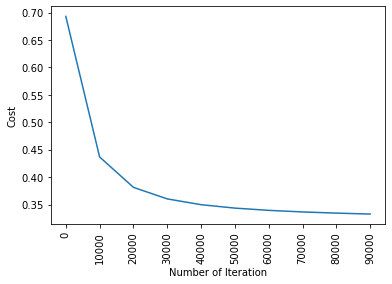

Test Accuracy:  85.792 %
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.4451902490222102
cost after  20000 iteration is :  0.39302691779815646
cost after  30000 iteration is :  0.37372255759680634
cost after  40000 iteration is :  0.3641848848086114
cost after  50000 iteration is :  0.35858120904357255
cost after  60000 iteration is :  0.35489639830808883
cost after  70000 iteration is :  0.3522822073264733
cost after  80000 iteration is :  0.35032766731404985
cost after  90000 iteration is :  0.3488108310270993


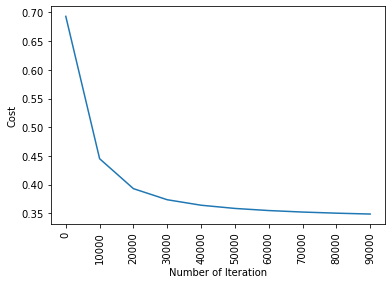

Test Accuracy:  89.617 %
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.4325329126934576
cost after  20000 iteration is :  0.3759229093935751
cost after  30000 iteration is :  0.35423227075103214
cost after  40000 iteration is :  0.3433136009218215
cost after  50000 iteration is :  0.33686175514695693
cost after  60000 iteration is :  0.3326304965123082
cost after  70000 iteration is :  0.3296481752870197
cost after  80000 iteration is :  0.3274338799193293
cost after  90000 iteration is :  0.3257244524469865


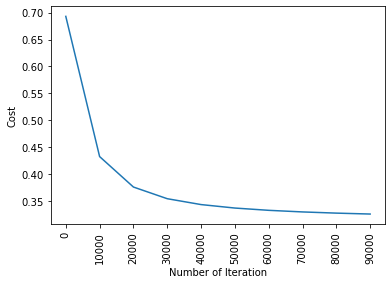

Test Accuracy:  85.87 %
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.4435682338959823
cost after  20000 iteration is :  0.38961849493555917
cost after  30000 iteration is :  0.36933019852414933
cost after  40000 iteration is :  0.35927002488905163
cost after  50000 iteration is :  0.35338468189117844
cost after  60000 iteration is :  0.3495435969725502
cost after  70000 iteration is :  0.3468374860726042
cost after  80000 iteration is :  0.3448224381158366
cost after  90000 iteration is :  0.34325858293574824


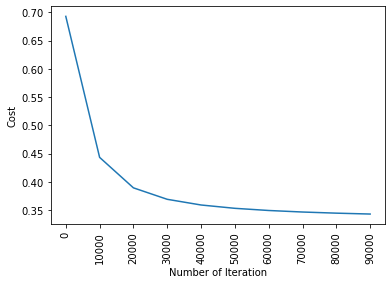

Test Accuracy:  85.326 %
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.44212853429759646
cost after  20000 iteration is :  0.3875512552234702
cost after  30000 iteration is :  0.3667560566987437
cost after  40000 iteration is :  0.3562767305297351
cost after  50000 iteration is :  0.35006127854121505
cost after  60000 iteration is :  0.34596995227066185
cost after  70000 iteration is :  0.34307981311431845
cost after  80000 iteration is :  0.34093323273369086
cost after  90000 iteration is :  0.3392783602259203


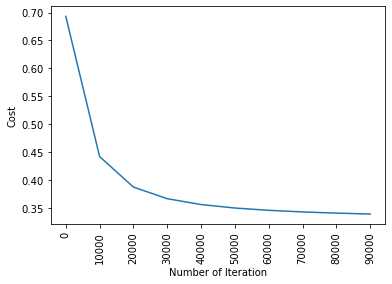

Test Accuracy:  86.413 %
The average Accuracy using the 5 fold cross validation is:  86.604


In [49]:
y_prediction_1, accuracy_fold1 = logistic_model(train_val1_X, train_val1_Y, test_val1_X, test_val1_Y, learning_rate = 0.0005, iterations = 100000)
y_prediction_2, accuracy_fold2 = logistic_model(train_val2_X, train_val2_Y, test_val2_X, test_val2_Y, learning_rate = 0.0005, iterations = 100000)
y_prediction_3, accuracy_fold3 = logistic_model(train_val3_X, train_val3_Y, test_val3_X, test_val3_Y, learning_rate = 0.0005, iterations = 100000)
y_prediction_4, accuracy_fold4 = logistic_model(train_val4_X, train_val4_Y, test_val4_X, test_val4_Y, learning_rate = 0.0005, iterations = 100000)
y_prediction_5, accuracy_fold5 = logistic_model(train_val5_X, train_val5_Y, test_val5_X, test_val5_Y, learning_rate = 0.0005, iterations = 100000)

cv_accuracy = [accuracy_fold1, accuracy_fold2, accuracy_fold3, accuracy_fold4, accuracy_fold5]
print("The average Accuracy using the 5 fold cross validation is: ",np.round(np.mean(cv_accuracy), 3))

The average Accuracy using the 5 fold cross validation is:  86.6%

### The next step to is test different hyperparameters (Learning Rate and Iteration number for each fold)

#### Testing different Learning Rates

learning rate is:  0.0001
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.5932381983296094
cost after  20000 iteration is :  0.5315230029314064
cost after  30000 iteration is :  0.4892186656575902
cost after  40000 iteration is :  0.45901551772176696
cost after  50000 iteration is :  0.4367691344888412
cost after  60000 iteration is :  0.4199281295496498
cost after  70000 iteration is :  0.4068685354494566
cost after  80000 iteration is :  0.3965263893329645
cost after  90000 iteration is :  0.38818493291525186


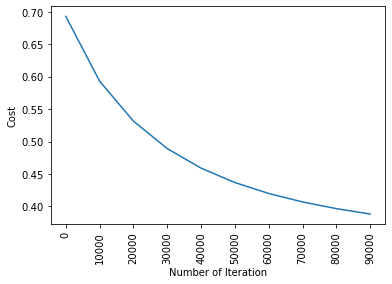

Test Accuracy:  84.153 %
-------------------------------------------------------------------------------------
learning rate is:  0.0005
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.4367658316137425
cost after  20000 iteration is :  0.38134686642893656
cost after  30000 iteration is :  0.3602824890723196
cost after  40000 iteration is :  0.3497235095007955
cost after  50000 iteration is :  0.34349048661621906
cost after  60000 iteration is :  0.3393964903794951
cost after  70000 iteration is :  0.33650122666259
cost after  80000 iteration is :  0.3343417887423662
cost after  90000 iteration is :  0.33266598191695673


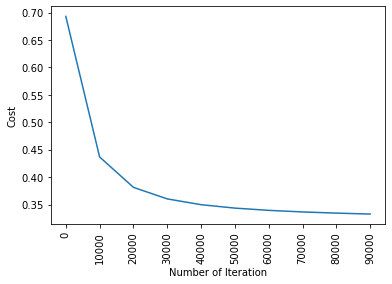

Test Accuracy:  85.792 %
-------------------------------------------------------------------------------------
learning rate is:  0.001
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.38134477711519166
cost after  20000 iteration is :  0.349722828538967
cost after  30000 iteration is :  0.3393961859119562
cost after  40000 iteration is :  0.33434162241205334
cost after  50000 iteration is :  0.33132498192731646
cost after  60000 iteration is :  0.32930591844209534
cost after  70000 iteration is :  0.3278478881581701
cost after  80000 iteration is :  0.32673452401039205
cost after  90000 iteration is :  0.3258464079278274


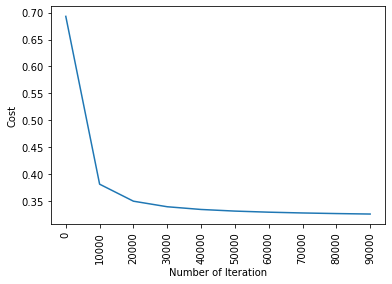

Test Accuracy:  85.792 %
-------------------------------------------------------------------------------------
learning rate is:  0.01
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.3251123111790541
cost after  20000 iteration is :  0.3210745972838372
cost after  30000 iteration is :  0.31903374475399776
cost after  40000 iteration is :  0.31775753139889235
cost after  50000 iteration is :  0.31690728159593684
cost after  60000 iteration is :  0.31631542636316634
cost after  70000 iteration is :  0.31588834969958635
cost after  80000 iteration is :  0.3155708157589473
cost after  90000 iteration is :  0.3153288146976606


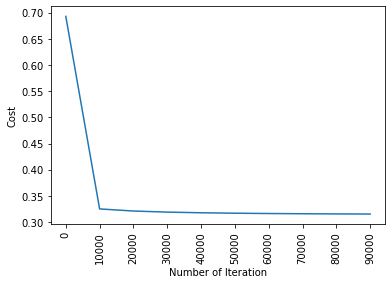

Test Accuracy:  85.792 %
-------------------------------------------------------------------------------------
Average Accuracy is:  85.38251366120218


In [50]:
learning_rates = [0.0001, 0.0005, 0.001, 0.01] 
Y_pred_cv1 = {}
accuracy1 = []

for i in learning_rates:
    print ("learning rate is: ",i)
    Y_pred_cv1[i], acc1 = logistic_model(train_val1_X, train_val1_Y, test_val1_X, test_val1_Y, learning_rate = i, iterations = 100000)
    accuracy1.append(acc1)
    print("-------------------------------------------------------------------------------------")

print("Average Accuracy is: ", np.mean(accuracy1))

In [51]:
accuracy1

[84.15300546448087, 85.79234972677595, 85.79234972677595, 85.79234972677595]

learning rate is:  0.0001
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.5971535266289593
cost after  20000 iteration is :  0.5367958349807667
cost after  30000 iteration is :  0.4956463743610166
cost after  40000 iteration is :  0.46649812018234393
cost after  50000 iteration is :  0.44519345433374147
cost after  60000 iteration is :  0.42918240870413016
cost after  70000 iteration is :  0.41685122231070026
cost after  80000 iteration is :  0.40714837710188084
cost after  90000 iteration is :  0.39936911262994973


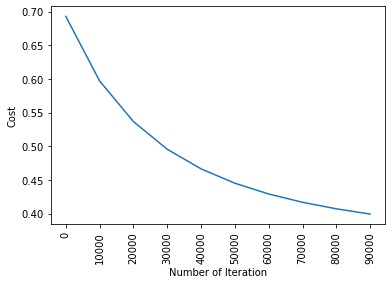

Test Accuracy:  87.978 %
-------------------------------------------------------------------------------------
learning rate is:  0.0005
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.4451902490222102
cost after  20000 iteration is :  0.39302691779815646
cost after  30000 iteration is :  0.37372255759680634
cost after  40000 iteration is :  0.3641848848086114
cost after  50000 iteration is :  0.35858120904357255
cost after  60000 iteration is :  0.35489639830808883
cost after  70000 iteration is :  0.3522822073264733
cost after  80000 iteration is :  0.35032766731404985
cost after  90000 iteration is :  0.3488108310270993


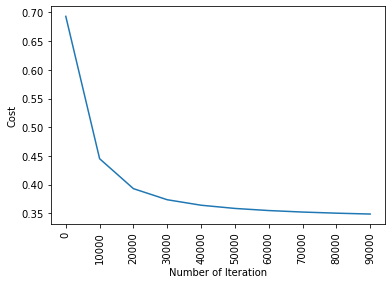

Test Accuracy:  89.617 %
-------------------------------------------------------------------------------------
learning rate is:  0.001
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.39302496486293254
cost after  20000 iteration is :  0.3641842843181588
cost after  30000 iteration is :  0.3548961350085376
cost after  40000 iteration is :  0.35032752154853597
cost after  50000 iteration is :  0.34760082146446236
cost after  60000 iteration is :  0.3457983736341838
cost after  70000 iteration is :  0.34452749937028493
cost after  80000 iteration is :  0.34358728984219866
cost after  90000 iteration is :  0.3428634289352504


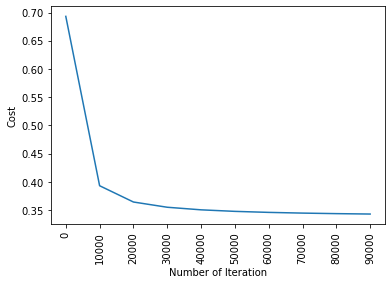

Test Accuracy:  89.071 %
-------------------------------------------------------------------------------------
learning rate is:  0.01
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.34228614785875416
cost after  20000 iteration is :  0.3394282334796107
cost after  30000 iteration is :  0.3380384014273086
cost after  40000 iteration is :  0.3371360827455435
cost after  50000 iteration is :  0.3365162660613062
cost after  60000 iteration is :  0.3360765501305418
cost after  70000 iteration is :  0.3357566878419156
cost after  80000 iteration is :  0.3355193096070306
cost after  90000 iteration is :  0.3353403089110316


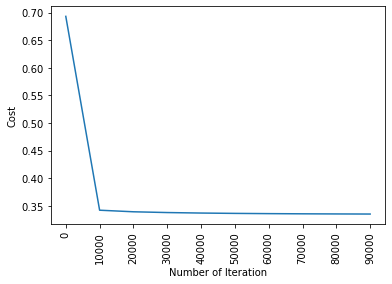

Test Accuracy:  86.885 %
-------------------------------------------------------------------------------------
Average Accuracy is:  88.3879781420765


In [52]:
learning_rates = [0.0001, 0.0005, 0.001, 0.01] 
Y_pred_cv2 = {}
accuracy2 = []
for i in learning_rates:
    print ("learning rate is: ",i)
    Y_pred_cv2[i], acc2 = logistic_model(train_val2_X, train_val2_Y, test_val2_X, test_val2_Y, learning_rate = i, iterations = 100000)
    accuracy2.append(acc2)
    print("-------------------------------------------------------------------------------------")
    
print("Average Accuracy is: ", np.mean(accuracy2))

In [53]:
accuracy2

[87.97814207650273, 89.61748633879782, 89.07103825136612, 86.88524590163934]

learning rate is:  0.0001
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.5907841913604494
cost after  20000 iteration is :  0.5284797062094801
cost after  30000 iteration is :  0.4857353250802798
cost after  40000 iteration is :  0.4551350173456262
cost after  50000 iteration is :  0.43253624463164964
cost after  60000 iteration is :  0.41538722558867214
cost after  70000 iteration is :  0.40205970337868735
cost after  80000 iteration is :  0.3914843758165536
cost after  90000 iteration is :  0.3829393778901258


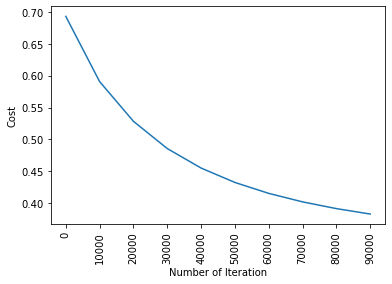

Test Accuracy:  87.5 %
-------------------------------------------------------------------------------------
learning rate is:  0.0005
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.4325329126934576
cost after  20000 iteration is :  0.3759229093935751
cost after  30000 iteration is :  0.35423227075103214
cost after  40000 iteration is :  0.3433136009218215
cost after  50000 iteration is :  0.33686175514695693
cost after  60000 iteration is :  0.3326304965123082
cost after  70000 iteration is :  0.3296481752870197
cost after  80000 iteration is :  0.3274338799193293
cost after  90000 iteration is :  0.3257244524469865


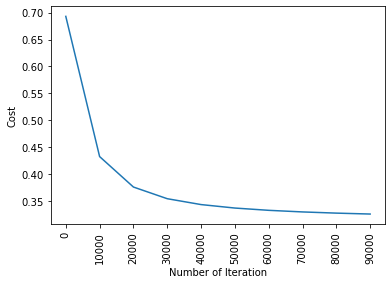

Test Accuracy:  85.87 %
-------------------------------------------------------------------------------------
learning rate is:  0.001
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.3759207807192099
cost after  20000 iteration is :  0.3433128951013363
cost after  30000 iteration is :  0.3326301771950427
cost after  40000 iteration is :  0.3274337046821194
cost after  50000 iteration is :  0.3243641008518695
cost after  60000 iteration is :  0.3223324483449474
cost after  70000 iteration is :  0.32088087165346774
cost after  80000 iteration is :  0.3197830763732742
cost after  90000 iteration is :  0.31891495198597253


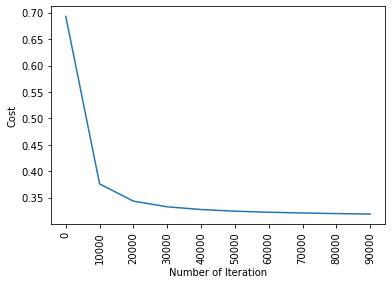

Test Accuracy:  85.87 %
-------------------------------------------------------------------------------------
learning rate is:  0.01
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.3182030808053279
cost after  20000 iteration is :  0.31443098651888346
cost after  30000 iteration is :  0.31265676278253
cost after  40000 iteration is :  0.31156753335138127
cost after  50000 iteration is :  0.310822278293286
cost after  60000 iteration is :  0.31027824505893414
cost after  70000 iteration is :  0.3098646658863456
cost after  80000 iteration is :  0.30954201428662725
cost after  90000 iteration is :  0.30928600611906365


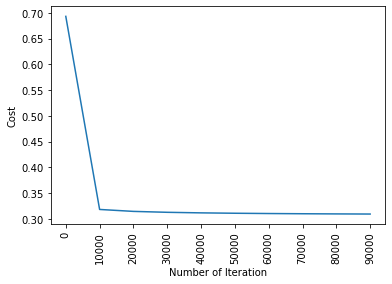

Test Accuracy:  80.978 %
-------------------------------------------------------------------------------------
Average Accuracy is:  85.05434782608697


In [54]:
learning_rates = [0.0001, 0.0005, 0.001, 0.01] 
Y_pred_cv3 = {}
accuracy3 = []
for i in learning_rates:
    print ("learning rate is: ",i)
    Y_pred_cv3[i], acc3 = logistic_model(train_val3_X, train_val3_Y, test_val3_X, test_val3_Y, learning_rate = i, iterations = 100000)
    accuracy3.append(acc3)
    print("-------------------------------------------------------------------------------------")
    
print("Average Accuracy is: ", np.mean(accuracy3))    

In [55]:
accuracy3

[87.5, 85.86956521739131, 85.86956521739131, 80.97826086956522]

learning rate is:  0.0001
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.5968219053115619
cost after  20000 iteration is :  0.5363725431520417
cost after  30000 iteration is :  0.49490036016829353
cost after  40000 iteration is :  0.4653245843013784
cost after  50000 iteration is :  0.4435714493661891
cost after  60000 iteration is :  0.4271299205267734
cost after  70000 iteration is :  0.4144021583432131
cost after  80000 iteration is :  0.404341606076033
cost after  90000 iteration is :  0.39624336714019665


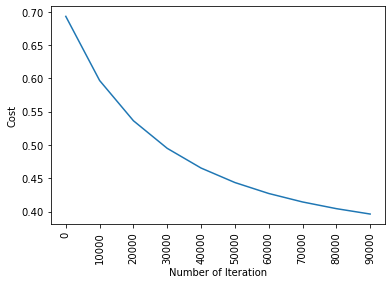

Test Accuracy:  83.696 %
-------------------------------------------------------------------------------------
learning rate is:  0.0005
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.4435682338959823
cost after  20000 iteration is :  0.38961849493555917
cost after  30000 iteration is :  0.36933019852414933
cost after  40000 iteration is :  0.35927002488905163
cost after  50000 iteration is :  0.35338468189117844
cost after  60000 iteration is :  0.3495435969725502
cost after  70000 iteration is :  0.3468374860726042
cost after  80000 iteration is :  0.3448224381158366
cost after  90000 iteration is :  0.34325858293574824


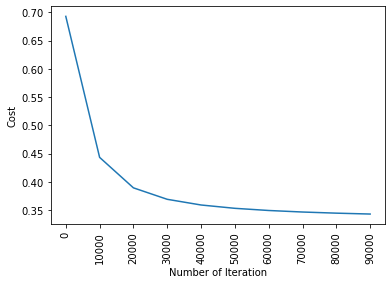

Test Accuracy:  85.326 %
-------------------------------------------------------------------------------------
learning rate is:  0.001
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.3896164899217966
cost after  20000 iteration is :  0.3592693916147228
cost after  30000 iteration is :  0.34954332087400747
cost after  40000 iteration is :  0.3448222896504704
cost after  50000 iteration is :  0.34200539141250713
cost after  60000 iteration is :  0.3401106481640398
cost after  70000 iteration is :  0.3387303401353297
cost after  80000 iteration is :  0.33766386786048347
cost after  90000 iteration is :  0.3368013553764756


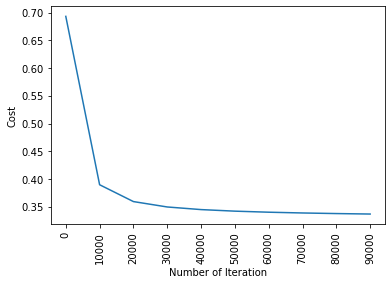

Test Accuracy:  85.326 %
-------------------------------------------------------------------------------------
learning rate is:  0.01
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.3360779102991479
cost after  20000 iteration is :  0.3318914269733281
cost after  30000 iteration is :  0.3297082972137246
cost after  40000 iteration is :  0.3283416284129209
cost after  50000 iteration is :  0.3274193826455743
cost after  60000 iteration is :  0.32676238659493184
cost after  70000 iteration is :  0.32627517887794755
cost after  80000 iteration is :  0.32590310474009343
cost after  90000 iteration is :  0.32561278319391973


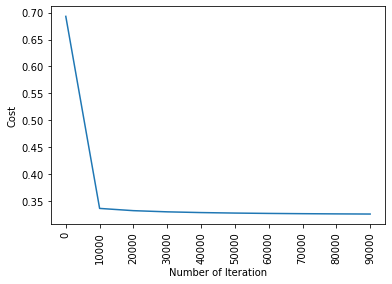

Test Accuracy:  85.87 %
-------------------------------------------------------------------------------------
Average Accuracy is:  85.05434782608695


In [56]:
learning_rates = [0.0001, 0.0005, 0.001, 0.01] 
Y_pred_cv4 = {}
accuracy4 = []
for i in learning_rates:
    print ("learning rate is: ",i)
    Y_pred_cv4[i], acc4 = logistic_model(train_val4_X, train_val4_Y, test_val4_X, test_val4_Y, learning_rate = i, iterations = 100000)
    accuracy4.append(acc4)
    print("-------------------------------------------------------------------------------------")
    
print("Average Accuracy is: ", np.mean(accuracy4))

In [57]:
accuracy4

[83.69565217391305, 85.32608695652173, 85.32608695652173, 85.86956521739131]

learning rate is:  0.0001
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.5966209725483446
cost after  20000 iteration is :  0.5356568429099613
cost after  30000 iteration is :  0.4938592284885265
cost after  40000 iteration is :  0.46405863231610994
cost after  50000 iteration is :  0.4421317924099467
cost after  60000 iteration is :  0.4255438560476772
cost after  70000 iteration is :  0.4126849505191403
cost after  80000 iteration is :  0.4025023311764854
cost after  90000 iteration is :  0.39428794702341696


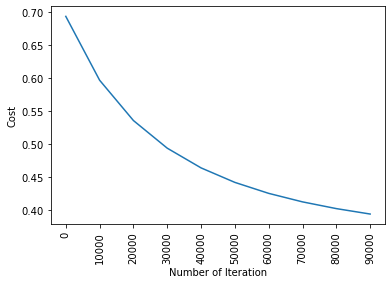

Test Accuracy:  87.5 %
-------------------------------------------------------------------------------------
learning rate is:  0.0005
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.44212853429759646
cost after  20000 iteration is :  0.3875512552234702
cost after  30000 iteration is :  0.3667560566987437
cost after  40000 iteration is :  0.3562767305297351
cost after  50000 iteration is :  0.35006127854121505
cost after  60000 iteration is :  0.34596995227066185
cost after  70000 iteration is :  0.34307981311431845
cost after  80000 iteration is :  0.34093323273369086
cost after  90000 iteration is :  0.3392783602259203


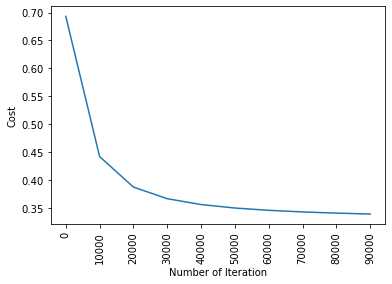

Test Accuracy:  86.413 %
-------------------------------------------------------------------------------------
learning rate is:  0.001
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.3875491983651147
cost after  20000 iteration is :  0.3562760533907562
cost after  30000 iteration is :  0.3459696431583429
cost after  40000 iteration is :  0.34093306108764126
cost after  50000 iteration is :  0.33796486422335054
cost after  60000 iteration is :  0.3360126703768934
cost after  70000 iteration is :  0.3346262338646822
cost after  80000 iteration is :  0.3335805063737651
cost after  90000 iteration is :  0.33275176739660434


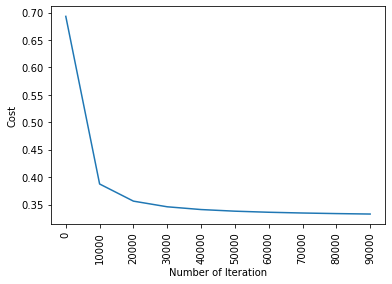

Test Accuracy:  86.413 %
-------------------------------------------------------------------------------------
learning rate is:  0.01
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.3320672872588925
cost after  20000 iteration is :  0.32814252831666657
cost after  30000 iteration is :  0.3259706838390492
cost after  40000 iteration is :  0.32453457088927223
cost after  50000 iteration is :  0.32353503073185086
cost after  60000 iteration is :  0.3228145635088528
cost after  70000 iteration is :  0.3222813727080665
cost after  80000 iteration is :  0.32187876071669613
cost after  90000 iteration is :  0.32156998815818727


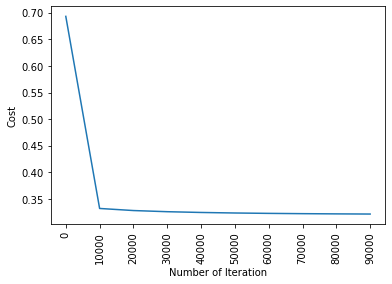

Test Accuracy:  85.87 %
-------------------------------------------------------------------------------------
Average Accuracy is:  86.54891304347827


In [58]:
learning_rates = [0.0001, 0.0005, 0.001, 0.01] 
Y_pred_cv5 = {}
accuracy5 = []
for i in learning_rates:
    print ("learning rate is: ",i)
    Y_pred_cv5[i], acc5 = logistic_model(train_val5_X, train_val5_Y, test_val5_X, test_val5_Y, learning_rate = i, iterations = 100000)
    accuracy5.append(acc5)
    print("-------------------------------------------------------------------------------------")
    
print("Average Accuracy is: ", np.mean(accuracy5))

In [59]:
accuracy5

[87.5, 86.41304347826087, 86.41304347826087, 85.86956521739131]

In [60]:
Average_accuracy = accuracy1+accuracy2+accuracy3+accuracy4+accuracy5
np.mean(Average_accuracy) 

86.08562009978617

#### Testing Different Iteration rates

iteration_number is:  50000
cost after  0 iteration is :  0.6931471805599453
cost after  5000 iteration is :  0.5085032724636417
cost after  10000 iteration is :  0.4367658316137425
cost after  15000 iteration is :  0.4014065799477086
cost after  20000 iteration is :  0.38134686642893656
cost after  25000 iteration is :  0.36876849937195555
cost after  30000 iteration is :  0.3602824890723196
cost after  35000 iteration is :  0.35423073997962473
cost after  40000 iteration is :  0.3497235095007955
cost after  45000 iteration is :  0.34624781922524245


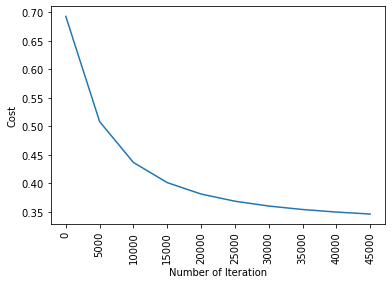

Test Accuracy:  84.699 %
-------------------------------------------------------------------------------------
iteration_number is:  100000
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.4367658316137425
cost after  20000 iteration is :  0.38134686642893656
cost after  30000 iteration is :  0.3602824890723196
cost after  40000 iteration is :  0.3497235095007955
cost after  50000 iteration is :  0.34349048661621906
cost after  60000 iteration is :  0.3393964903794951
cost after  70000 iteration is :  0.33650122666259
cost after  80000 iteration is :  0.3343417887423662
cost after  90000 iteration is :  0.33266598191695673


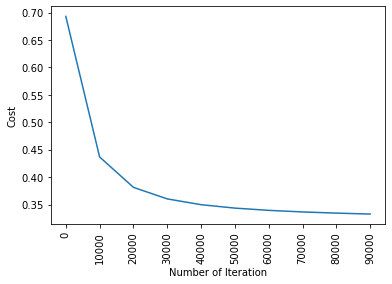

Test Accuracy:  85.792 %
-------------------------------------------------------------------------------------
iteration_number is:  300000
cost after  0 iteration is :  0.6931471805599453
cost after  30000 iteration is :  0.3602824890723196
cost after  60000 iteration is :  0.3393964903794951
cost after  90000 iteration is :  0.33266598191695673
cost after  120000 iteration is :  0.32930598723979837
cost after  150000 iteration is :  0.3272571425461967
cost after  180000 iteration is :  0.3258464344670576
cost after  210000 iteration is :  0.3247891975129182
cost after  240000 iteration is :  0.32394673399858326
cost after  270000 iteration is :  0.32324501168864966


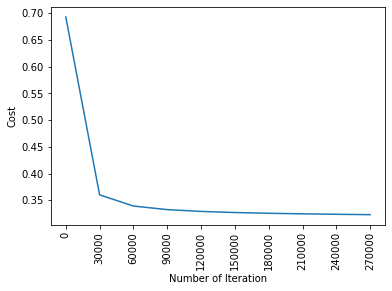

Test Accuracy:  85.792 %
-------------------------------------------------------------------------------------
Average Accuracy is:  85.42805100182149


In [61]:
iteration_number = [50000, 100000, 300000]  
Y_pred_cv_1 = {}
accuracy_in1 = []

for i in iteration_number:
    print ("iteration_number is: ",i)
    Y_pred_cv_1[i], acc_in1 = logistic_model(train_val1_X, train_val1_Y, test_val1_X, test_val1_Y, learning_rate = 0.0005, iterations = i)
    accuracy_in1.append(acc_in1)
    print("-------------------------------------------------------------------------------------")
    
print("Average Accuracy is: ", np.mean(accuracy_in1))

iteration_number is:  50000
cost after  0 iteration is :  0.6931471805599453
cost after  5000 iteration is :  0.5143652852489782
cost after  10000 iteration is :  0.4451902490222102
cost after  15000 iteration is :  0.41171939227014104
cost after  20000 iteration is :  0.39302691779815646
cost after  25000 iteration is :  0.3814543693333028
cost after  30000 iteration is :  0.37372255759680634
cost after  35000 iteration is :  0.36824624729827465
cost after  40000 iteration is :  0.3641848848086114
cost after  45000 iteration is :  0.3610595494714708


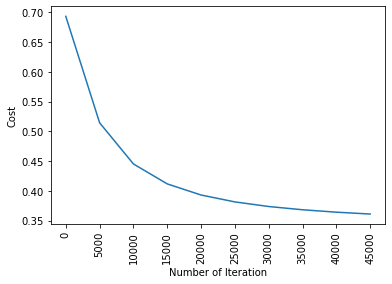

Test Accuracy:  89.071 %
-------------------------------------------------------------------------------------
iteration_number is:  100000
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.4451902490222102
cost after  20000 iteration is :  0.39302691779815646
cost after  30000 iteration is :  0.37372255759680634
cost after  40000 iteration is :  0.3641848848086114
cost after  50000 iteration is :  0.35858120904357255
cost after  60000 iteration is :  0.35489639830808883
cost after  70000 iteration is :  0.3522822073264733
cost after  80000 iteration is :  0.35032766731404985
cost after  90000 iteration is :  0.3488108310270993


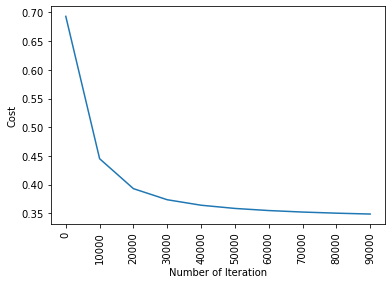

Test Accuracy:  89.617 %
-------------------------------------------------------------------------------------
iteration_number is:  300000
cost after  0 iteration is :  0.6931471805599453
cost after  30000 iteration is :  0.37372255759680634
cost after  60000 iteration is :  0.35489639830808883
cost after  90000 iteration is :  0.3488108310270993
cost after  120000 iteration is :  0.3457984368354312
cost after  150000 iteration is :  0.3440246258588364
cost after  180000 iteration is :  0.34286345353985975
cost after  210000 iteration is :  0.3420386805331268
cost after  240000 iteration is :  0.3414123371054707
cost after  270000 iteration is :  0.3409102443803418


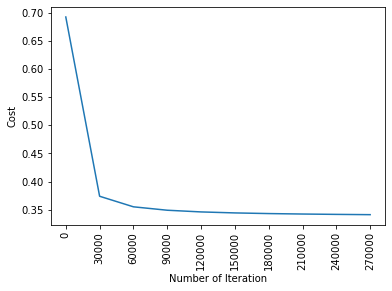

Test Accuracy:  88.525 %
-------------------------------------------------------------------------------------
Average Accuracy is:  89.07103825136612


In [62]:
iteration_number = [50000, 100000, 300000] 
Y_pred_cv_2 = {}
accuracy_in2 = []

for i in iteration_number:
    print ("iteration_number is: ",i)
    Y_pred_cv_2[i], acc_in2 = logistic_model(train_val2_X, train_val2_Y, test_val2_X, test_val2_Y, learning_rate = 0.0005, iterations = i)
    accuracy_in2.append(acc_in2)
    print("-------------------------------------------------------------------------------------")
    
print("Average Accuracy is: ", np.mean(accuracy_in2))

iteration_number is:  50000
cost after  0 iteration is :  0.6931471805599453
cost after  5000 iteration is :  0.5052340094875577
cost after  10000 iteration is :  0.4325329126934576
cost after  15000 iteration is :  0.39647711298987054
cost after  20000 iteration is :  0.3759229093935751
cost after  25000 iteration is :  0.36298550372633287
cost after  30000 iteration is :  0.35423227075103214
cost after  35000 iteration is :  0.34797751747596983
cost after  40000 iteration is :  0.3433136009218215
cost after  45000 iteration is :  0.33971552224766116


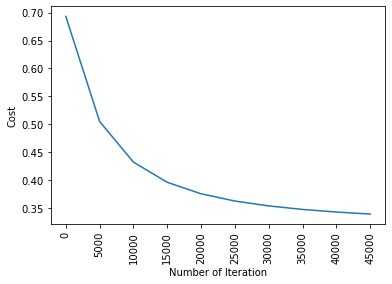

Test Accuracy:  86.957 %
-------------------------------------------------------------------------------------
iteration_number is:  100000
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.4325329126934576
cost after  20000 iteration is :  0.3759229093935751
cost after  30000 iteration is :  0.35423227075103214
cost after  40000 iteration is :  0.3433136009218215
cost after  50000 iteration is :  0.33686175514695693
cost after  60000 iteration is :  0.3326304965123082
cost after  70000 iteration is :  0.3296481752870197
cost after  80000 iteration is :  0.3274338799193293
cost after  90000 iteration is :  0.3257244524469865


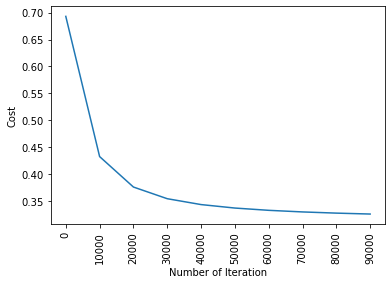

Test Accuracy:  85.87 %
-------------------------------------------------------------------------------------
iteration_number is:  300000
cost after  0 iteration is :  0.6931471805599453
cost after  30000 iteration is :  0.35423227075103214
cost after  60000 iteration is :  0.3326304965123082
cost after  90000 iteration is :  0.3257244524469865
cost after  120000 iteration is :  0.32233252038405646
cost after  150000 iteration is :  0.3202971468882015
cost after  180000 iteration is :  0.318914979368272
cost after  210000 iteration is :  0.3178916121192635
cost after  240000 iteration is :  0.3170854599625575
cost after  270000 iteration is :  0.3164217830418866


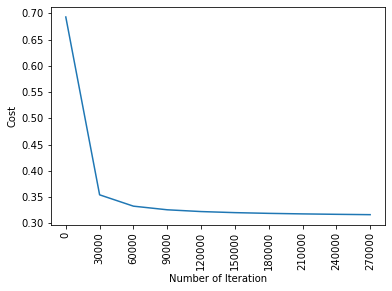

Test Accuracy:  84.783 %
-------------------------------------------------------------------------------------
Average Accuracy is:  85.86956521739131


In [63]:
iteration_number = [50000, 100000, 300000] 
Y_pred_cv_3 = {}
accuracy_in3 = []

for i in iteration_number:
    print ("iteration_number is: ",i)
    Y_pred_cv_3[i], acc_in3 = logistic_model(train_val3_X, train_val3_Y, test_val3_X, test_val3_Y, learning_rate = 0.0005, iterations = i)
    accuracy_in3.append(acc_in3)
    print("-------------------------------------------------------------------------------------")
    
print("Average Accuracy is: ", np.mean(accuracy_in3))

iteration_number is:  50000
cost after  0 iteration is :  0.6931471805599453
cost after  5000 iteration is :  0.5138014725470939
cost after  10000 iteration is :  0.4435682338959823
cost after  15000 iteration is :  0.40908651352979125
cost after  20000 iteration is :  0.38961849493555917
cost after  25000 iteration is :  0.37747649130585875
cost after  30000 iteration is :  0.36933019852414933
cost after  35000 iteration is :  0.3635520134199549
cost after  40000 iteration is :  0.35927002488905163
cost after  45000 iteration is :  0.35598268838843966


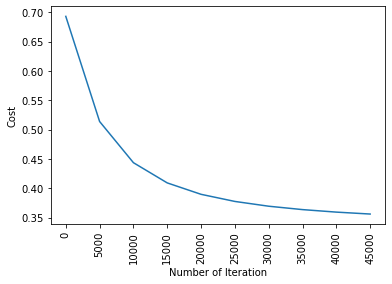

Test Accuracy:  83.696 %
-------------------------------------------------------------------------------------
iteration_number is:  100000
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.4435682338959823
cost after  20000 iteration is :  0.38961849493555917
cost after  30000 iteration is :  0.36933019852414933
cost after  40000 iteration is :  0.35927002488905163
cost after  50000 iteration is :  0.35338468189117844
cost after  60000 iteration is :  0.3495435969725502
cost after  70000 iteration is :  0.3468374860726042
cost after  80000 iteration is :  0.3448224381158366
cost after  90000 iteration is :  0.34325858293574824


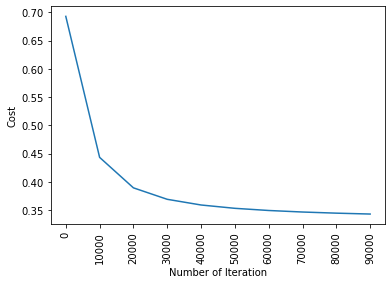

Test Accuracy:  85.326 %
-------------------------------------------------------------------------------------
iteration_number is:  300000
cost after  0 iteration is :  0.6931471805599453
cost after  30000 iteration is :  0.36933019852414933
cost after  60000 iteration is :  0.3495435969725502
cost after  90000 iteration is :  0.34325858293574824
cost after  120000 iteration is :  0.34011070856064723
cost after  150000 iteration is :  0.3381661928007464
cost after  180000 iteration is :  0.3368013784549356
cost after  210000 iteration is :  0.335755853477616
cost after  240000 iteration is :  0.33490488546649944
cost after  270000 iteration is :  0.3341831166617142


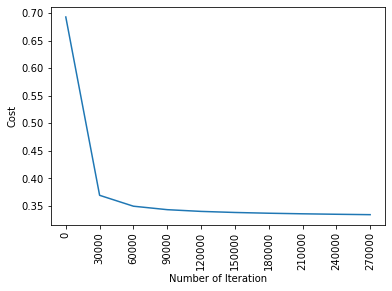

Test Accuracy:  85.326 %
-------------------------------------------------------------------------------------
Average Accuracy is:  84.78260869565217


In [64]:
iteration_number = [50000, 100000, 300000] 
Y_pred_cv_4 = {}
accuracy_in4 = []

for i in iteration_number:
    print ("iteration_number is: ",i)
    Y_pred_cv_4[i], acc_in4 = logistic_model(train_val4_X, train_val4_Y, test_val4_X, test_val4_Y, learning_rate = 0.0005, iterations = i)
    accuracy_in4.append(acc_in4)
    print("-------------------------------------------------------------------------------------")
    
print("Average Accuracy is: ", np.mean(accuracy_in4))

iteration_number is:  50000
cost after  0 iteration is :  0.6931471805599453
cost after  5000 iteration is :  0.5129056669794684
cost after  10000 iteration is :  0.44212853429759646
cost after  15000 iteration is :  0.40730734236095273
cost after  20000 iteration is :  0.3875512552234702
cost after  25000 iteration is :  0.37514526813849347
cost after  30000 iteration is :  0.3667560566987437
cost after  35000 iteration is :  0.3607569577115074
cost after  40000 iteration is :  0.3562767305297351
cost after  45000 iteration is :  0.3528136019071463


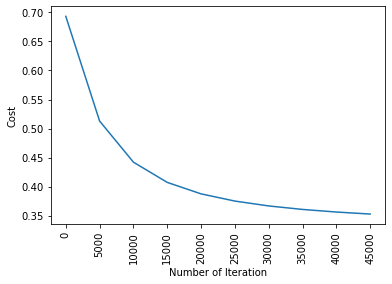

Test Accuracy:  86.957 %
-------------------------------------------------------------------------------------
iteration_number is:  100000
cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.44212853429759646
cost after  20000 iteration is :  0.3875512552234702
cost after  30000 iteration is :  0.3667560566987437
cost after  40000 iteration is :  0.3562767305297351
cost after  50000 iteration is :  0.35006127854121505
cost after  60000 iteration is :  0.34596995227066185
cost after  70000 iteration is :  0.34307981311431845
cost after  80000 iteration is :  0.34093323273369086
cost after  90000 iteration is :  0.3392783602259203


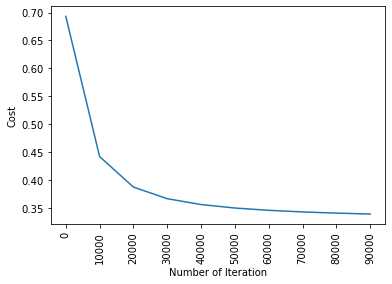

Test Accuracy:  86.413 %
-------------------------------------------------------------------------------------
iteration_number is:  300000
cost after  0 iteration is :  0.6931471805599453
cost after  30000 iteration is :  0.3667560566987437
cost after  60000 iteration is :  0.34596995227066185
cost after  90000 iteration is :  0.3392783602259203
cost after  120000 iteration is :  0.33601274105265433
cost after  150000 iteration is :  0.3340701532380548
cost after  180000 iteration is :  0.33275179295423907
cost after  210000 iteration is :  0.33176524606427404
cost after  240000 iteration is :  0.3309723150582931
cost after  270000 iteration is :  0.3303022349194601


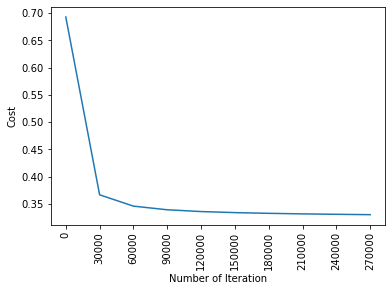

Test Accuracy:  86.413 %
-------------------------------------------------------------------------------------
Average Accuracy is:  86.59420289855073


In [65]:
iteration_number = [50000, 100000, 300000] 
Y_pred_cv_5 = {}
accuracy_in5 = []

for i in iteration_number:
    print ("iteration_number is: ",i)
    Y_pred_cv_5[i], acc_in5 = logistic_model(train_val5_X, train_val5_Y, test_val5_X, test_val5_Y, learning_rate = 0.0005, iterations = i)
    accuracy_in5.append(acc_in5)
    print("-------------------------------------------------------------------------------------")
    
print("Average Accuracy is: ", np.mean(accuracy_in5))

In [66]:
Average_accuracy_in = accuracy_in1+accuracy_in2+accuracy_in3+accuracy_in4+accuracy_in5
np.mean(Average_accuracy_in) 

86.34909321295636

## 07. Conclusion

The accuracy using the library function is 84.24%.

The F1 score using the library function is 84%

The accuracy using the library function and cross validation library is 86.714%

______________________________________________________________________________________________________________


The accuracy using the custom Logistic Regression Function is 85.33%

The F1 score generated from the custom LR function is 86.96%

The accuracy using the custom Logistic Regression Function and applying cross validation is 86.6%
